In [189]:
import pandas as pd
from datetime import date
from datetime import timedelta 

In [190]:
#Read in the dataset
dataset2=pd.read_csv('Users\welcomemymaster\Desktop\sT\/Dataset_2_original.txt',sep="\t" )
dataset2.head()

In [192]:
#Create a new column: Processing Days: Date sent to company - Date received
dataset2['Processing Days']=pd.to_datetime(dataset2['Date sent to company'])-pd.to_datetime(dataset2['Date received'])
dataset2['Processing Days'].head()

0   2 days
1   2 days
2   3 days
3   0 days
4   1 days
Name: Processing Days, dtype: timedelta64[ns]

In [194]:
#Check which product type do missign values fall in and fill in missing values based on the mdeian of processing days

dataset2[pd.isnull(dataset2['Date received'])]['Product'].unique()

,Date received,Product,Sub-product,Issue,Company,State,ZIP code,Tags,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Processing Days
6,NaN,Mortgage,Other mortgage,"Loan modification,collection,foreclosure","BANK OF AMERICA, NATIONAL ASSOCIATION",NY,11501.0,NaN,Referral,5/18/12,Closed without relief,Yes,No,82678,NaT
27,NaN,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure","BANK OF AMERICA, NATIONAL ASSOCIATION",MA,2333.0,NaN,Web,2/29/12,Closed without relief,Yes,No,28013,NaT
42,NaN,Student loan,Non-federal student loan,Repaying your loan,ACS Education Services,CA,92129.0,NaN,Web,6/15/12,Closed with non-monetary relief,Yes,No,97429,NaT
60,NaN,Mortgage,Other mortgage,"Loan modification,collection,foreclosure","BANK OF AMERICA, NATIONAL ASSOCIATION",CA,92675.0,NaN,Referral,6/14/12,Closed with non-monetary relief,Yes,No,96219,NaT
90,NaN,Credit card,NaN,Late fee,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,90291.0,NaN,Referral,4/05/12,Closed with relief,Yes,No,40742,NaT
117,NaN,Credit card,NaN,Billing disputes,CAPITAL ONE FINANCIAL CORPORATION,PA,19148.0,NaN,Referral,3/01/12,Closed without relief,Yes,Yes,28727,NaT
144,NaN,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NATIONSTAR MORTGAGE,NY,12563.0,NaN,Referral,4/24/12,Closed without relief,Yes,Yes,81437,NaT
168,NaN,Credit card,NaN,Identity theft / Fraud / Embezzlement,"CITIBANK, N.A.",CA,91344.0,NaN,Referral,2/27/12,Closed with relief,Yes,No,27008,NaT


In [196]:
#Get records where Date_Received of the 3 Products is not null to get the median of processing days
Mortgae_W_Date = dataset2[pd.notnull(dataset2['Date received'])].loc[dataset2['Product']=='Mortgage']
StudentLoan_W_Date = dataset2[pd.notnull(dataset2['Date received'])].loc[dataset2['Product']=='Student loan']
CreditCard_W_Date = dataset2[pd.notnull(dataset2['Date received'])].loc[dataset2['Product']=='Credit card']

In [198]:
# Get a subset of records where Date received is not null and product type are in ('Mortgage','Student loan','Credit card')
Product_W_Date = dataset2[pd.notnull(dataset2['Date received'])].loc[dataset2['Product'].isin(['Mortgage','Student loan','Credit card'])]

In [199]:
#convert deltatime into integer
Product_W_Date['Processing Days'] = Product_W_Date['Processing Days'].dt.days.astype('int16')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009FD60B8>,
      dtype=object)

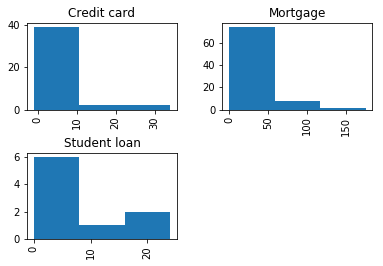

In [200]:
#Draw histogram for each of the product type to see how the process days distribute
Product_W_Date.hist(column='Processing Days', by='Product', bins=3)

#Turns out the distribution is skewed so here I'm going to use Date sent -  median of processing time to fill in the null value of Date received

In [236]:
#Get Median of processing days for each of the 3 product type
Mortgage_Fill = Product_W_Date.loc[Product_W_Date['Product'] == 'Mortgage']['Processing Days'].median()
StudentLoan_Fill = Product_W_Date.loc[Product_W_Date['Product'] == 'Student loan']['Processing Days'].median()
CreditCard_Fill = Product_W_Date.loc[Product_W_Date['Product'] == 'Credit card']['Processing Days'].median()

In [237]:
# Get records where there's missing Date received value for each of the 3 product
Mortgae_WO_Date = dataset2[pd.isnull(dataset2['Date received'])].loc[dataset2['Product']=='Mortgage']
StudentLoan_WO_Date = dataset2[pd.isnull(dataset2['Date received'])].loc[dataset2['Product']=='Student loan']
CreditCard_WO_Date = dataset2[pd.isnull(dataset2['Date received'])].loc[dataset2['Product']=='Credit card']

In [238]:
#Get the Date Received value from Date sent - median processing time for each of the 3 product 
 
Mortgae_WO_Date['Date received'] = pd.to_datetime(Mortgae_WO_Date['Date sent to company']) - timedelta(days=Mortgage_Fill)
StudentLoan_WO_Date['Date received'] = pd.to_datetime(StudentLoan_WO_Date['Date sent to company']) - timedelta(days=StudentLoan_Fill)
CreditCard_WO_Date['Date received'] = pd.to_datetime(CreditCard_WO_Date['Date sent to company']) - timedelta(days=CreditCard_Fill)

In [229]:
#Fill Missing Value for Mortgage Product Type
dataset2.loc[dataset2['Product']=='Mortgage', 'Date received'] = pd.to_datetime(dataset2.loc[dataset2['Product']=='Mortgage', 'Date received'].fillna(value=Mortgae_WO_Date['Date received']))
pd.to_datetime(dataset2.loc[dataset2['Product']=='Mortgage', 'Date received'])

2     2012-05-29
6     2012-05-15
7     2012-05-21
8     2012-05-21
9     2012-05-08
10    2012-06-23
11    2012-06-14
12    2012-05-01
13    2012-06-02
15    2012-02-15
19    2012-05-15
20    2012-05-17
21    2012-06-05
23    2012-06-23
25    2012-04-17
26    2012-04-22
27    2012-02-26
28    2012-02-28
29    2012-06-08
31    2012-06-21
35    2012-06-26
36    2012-02-14
38    2012-06-19
39    2012-06-13
40    2012-02-13
41    2012-06-15
43    2012-06-12
44    2012-02-26
45    2012-06-13
46    2012-06-05
         ...    
115   2012-03-26
116   2012-03-05
119   2012-03-05
123   2012-03-27
125   2012-01-04
126   2012-01-20
128   2012-01-09
129   2012-01-01
130   2012-01-24
131   2012-01-31
132   2012-01-12
133   2012-01-26
134   2012-01-22
135   2012-01-24
136   2012-01-27
138   2012-01-06
139   2012-01-19
140   2012-04-05
143   2012-01-26
144   2012-04-21
147   2012-01-30
151   2012-01-20
152   2012-01-20
153   2012-01-06
155   2012-04-11
156   2012-01-25
160   2012-01-31
161   2012-01-

In [242]:
#Fill Missing Value for StudentLoan Product Type
dataset2.loc[dataset2['Product']=='Student loan', 'Date received'] = pd.to_datetime(dataset2.loc[dataset2['Product']=='Student loan', 'Date received'].fillna(value=StudentLoan_WO_Date['Date received']))
pd.to_datetime(dataset2.loc[dataset2['Product']=='Student loan', 'Date received'])

0     2012-06-19
24    2012-06-21
30    2012-06-08
42    2012-06-10
50    2012-06-15
55    2012-06-28
78    2012-06-19
81    2012-06-15
99    2012-03-08
112   2012-03-15
Name: Date received, dtype: datetime64[ns]

In [243]:
#Fill Missing Value for CreditCard Product Type
dataset2.loc[dataset2['Product']=='Credit card', 'Date received'] = pd.to_datetime(dataset2.loc[dataset2['Product']=='Credit card', 'Date received'].fillna(value=CreditCard_WO_Date['Date received']))
pd.to_datetime(dataset2.loc[dataset2['Product']=='Credit card', 'Date received'])

4     2012-04-05
14    2012-06-20
17    2012-04-11
22    2012-06-02
32    2012-06-19
37    2012-06-05
54    2012-06-30
63    2012-06-20
64    2012-06-29
65    2012-06-27
68    2012-06-16
72    2012-06-19
76    2012-06-27
79    2012-06-19
82    2012-06-27
83    2012-03-11
87    2012-03-05
88    2012-03-29
89    2012-03-06
90    2012-04-03
91    2012-03-26
97    2012-03-18
103   2012-03-14
108   2012-03-27
109   2012-03-09
110   2012-03-02
117   2012-02-28
118   2012-03-02
127   2012-01-17
137   2012-04-02
141   2012-01-17
142   2012-01-27
145   2012-01-31
146   2012-01-31
148   2012-01-18
149   2012-04-27
154   2012-04-14
157   2012-01-09
158   2012-04-20
162   2012-02-18
164   2012-04-10
166   2012-01-06
167   2012-05-30
168   2012-02-25
170   2012-02-07
171   2012-02-29
Name: Date received, dtype: datetime64[ns]

In [251]:
#Check if there's any null values for Data received now
dataset2['Date received'] = pd.to_datetime(dataset2['Date received'])
dataset2['Date received'].isnull().values.any()

False

In [259]:
dataset2['Country']= 'United States'

In [260]:
ExportFile = dataset2.to_excel('Users\welcomemymaster\Desktop\sT\Dataset2_Fix.xlsx', index=None)